<a href="https://colab.research.google.com/github/Claudia060392/Portafolio-Ciencia-de-Datos/blob/main/Practicas%20Consolidadas/Modulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd

# Carga del archivo manualmente
archivo = files.upload()

# Lectura del CSV
df = pd.read_csv("olimpicos.csv")

# Primeras filas
print(df.head())

Saving olimpicos.csv to olimpicos.csv
           Atleta  Edad  Altura_cm  Peso_kg    Deporte  \
0      Usain Bolt    34        195       94  Atletismo   
1    Simone Biles    26        142       47   Gimnasia   
2  Michael Phelps    35        193       88   Natación   
3   Katie Ledecky    27        183       70   Natación   
4  Nadia Comaneci    45        160       50   Gimnasia   

   Entrenamientos_Semanales  Medallas_Totales     Pais  
0                         6                 8  Jamaica  
1                        10                 7   EE.UU.  
2                         9                23   EE.UU.  
3                         8                10   EE.UU.  
4                         7                 5  Rumania  


Primeras 5 filas:
           Atleta  Edad  Altura_cm  Peso_kg    Deporte  \
0      Usain Bolt    34        195       94  Atletismo   
1    Simone Biles    26        142       47   Gimnasia   
2  Michael Phelps    35        193       88   Natación   
3   Katie Ledecky    27        183       70   Natación   
4  Nadia Comaneci    45        160       50   Gimnasia   

   Entrenamientos_Semanales  Medallas_Totales     Pais  
0                         6                 8  Jamaica  
1                        10                 7   EE.UU.  
2                         9                23   EE.UU.  
3                         8                10   EE.UU.  
4                         7                 5  Rumania  

.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atleta                    7 non-null      object
 1   Edad          

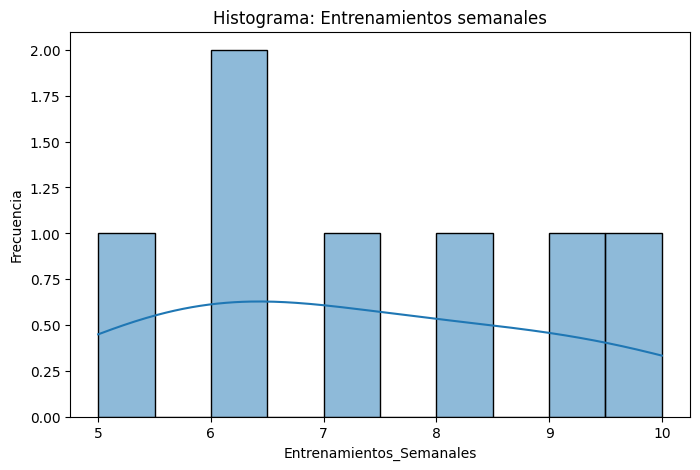


Tipos de datos por columna:
Atleta                      object
Edad                         int64
Altura_cm                    int64
Peso_kg                      int64
Deporte                     object
Entrenamientos_Semanales     int64
Medallas_Totales             int64
Pais                        object
dtype: object

Tendencia central de 'Medallas_Totales':
Media: 8.571428571428571
Mediana: 7.0
Moda: 3

Desviación estándar de 'Altura_cm': 18.715921411614076


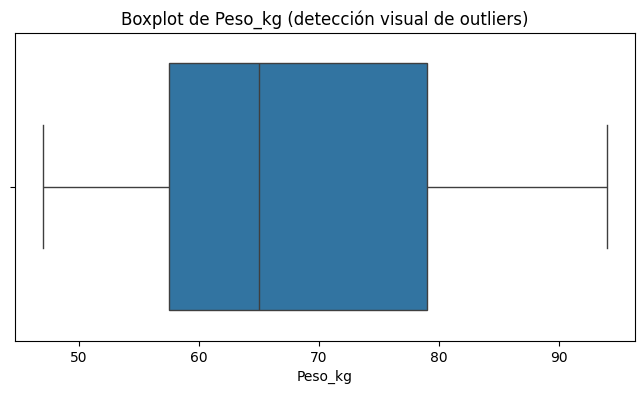


Correlación Pearson (Entrenamientos_Semanales vs Medallas_Totales): 0.5698362008613984


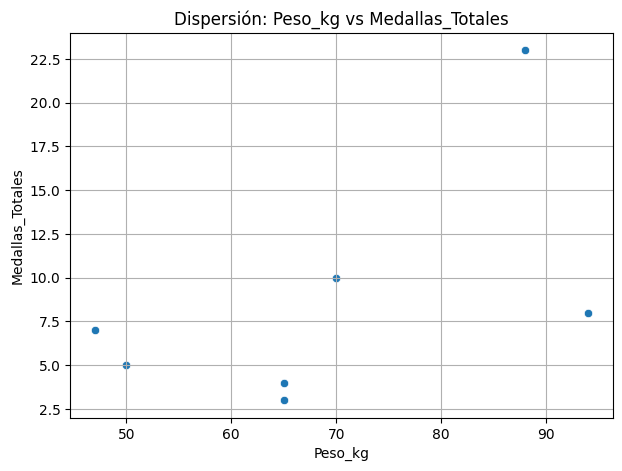


Interpreto que la correlación entre entrenamientos y medallas es moderada (positiva).

Regresión lineal (Medallas_Totales ~ Entrenamientos_Semanales):
Intercepto: -7.125
Pendiente: 2.1544117647058822
R^2: 0.32471329581215214


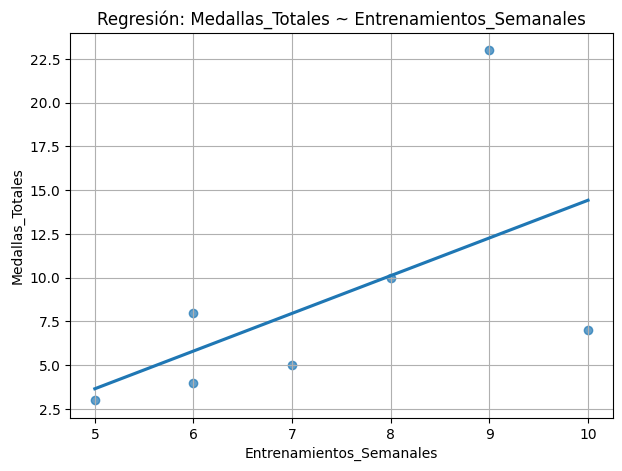


Matriz de correlación (numéricas):
                              Edad  Altura_cm   Peso_kg  \
Edad                      1.000000   0.075607 -0.078948   
Altura_cm                 0.075607   1.000000  0.941968   
Peso_kg                  -0.078948   0.941968  1.000000   
Entrenamientos_Semanales -0.637233  -0.357015 -0.204312   
Medallas_Totales         -0.265371   0.485236  0.562254   

                          Entrenamientos_Semanales  Medallas_Totales  
Edad                                     -0.637233         -0.265371  
Altura_cm                                -0.357015          0.485236  
Peso_kg                                  -0.204312          0.562254  
Entrenamientos_Semanales                  1.000000          0.569836  
Medallas_Totales                          0.569836          1.000000  


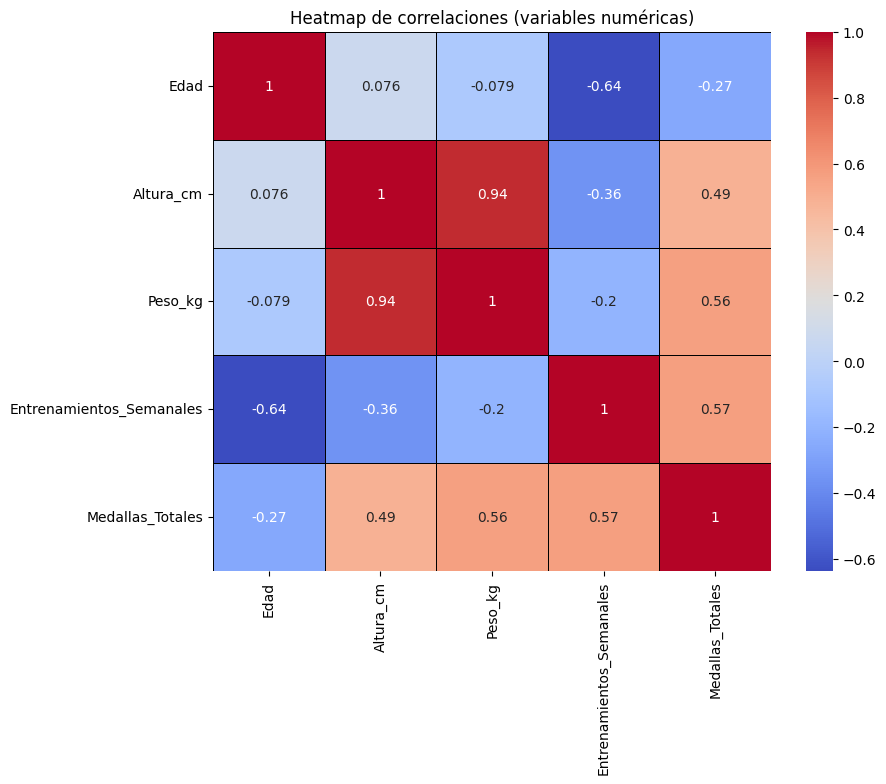

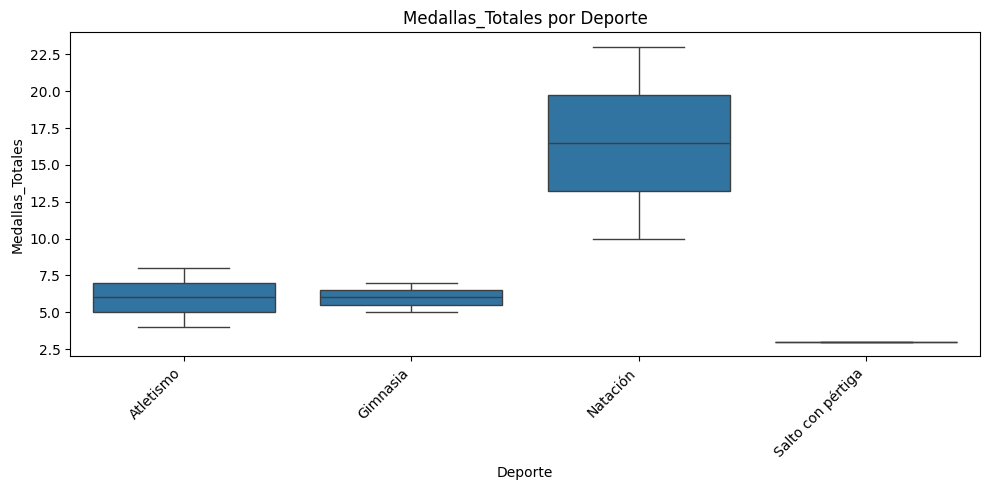

In [7]:
# Evaluación Final – Módulo 4: Análisis de atletas olímpicos
# Dataset: olimpicos.csv (con columnas: Atleta,Edad,Altura_cm,Peso_kg,Deporte,
# Entrenamientos_Semanales,Medallas_Totales,Pais)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -------------------------------------------------------------------
# 1) Análisis Exploratorio de Datos (EDA)
# -------------------------------------------------------------------
# Carga del dataset
df = pd.read_csv("olimpicos.csv")

# Visualizacion de primeras filas
print("Primeras 5 filas:")
print(df.head())

# Revisión de información general de tipos y nulos
print("\n.info():")
print(df.info())

# Estadísticas descriptivas generales
print("\n.describe():")
print(df.describe(include="all"))

# Histograma de Entrenamientos_Semanales
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Entrenamientos_Semanales", bins=10, kde=True)
plt.title("Histograma: Entrenamientos semanales")
plt.xlabel("Entrenamientos_Semanales")
plt.ylabel("Frecuencia")
plt.show()

# -------------------------------------------------------------------
# 2) Estadística Descriptiva
# -------------------------------------------------------------------
# Chequeo de los tipos de datos por columna
print("\nTipos de datos por columna:")
print(df.dtypes)

# Calculo de media, mediana y moda de Medallas_Totales
media_medallas = df["Medallas_Totales"].mean()
mediana_medallas = df["Medallas_Totales"].median()
moda_medallas = df["Medallas_Totales"].mode()
moda_valor = moda_medallas.iloc[0] if len(moda_medallas) > 0 else np.nan

print("\nTendencia central de 'Medallas_Totales':")
print("Media:", media_medallas)
print("Mediana:", mediana_medallas)
print("Moda:", moda_valor)

# Cálculo de la desviación estándar de Altura_cm
std_altura = df["Altura_cm"].std()
print("\nDesviación estándar de 'Altura_cm':", std_altura)

# Reviso outliers en Peso_kg con un boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Peso_kg"])
plt.title("Boxplot de Peso_kg (detección visual de outliers)")
plt.xlabel("Peso_kg")
plt.show()

# -------------------------------------------------------------------
# 3) Análisis de Correlación
# -------------------------------------------------------------------
# Correlación de Pearson entre Entrenamientos_Semanales y Medallas_Totales
pearson_em = df["Entrenamientos_Semanales"].corr(df["Medallas_Totales"])
print("\nCorrelación Pearson (Entrenamientos_Semanales vs Medallas_Totales):", pearson_em)

# Scatterplot entre Peso_kg y Medallas_Totales
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Peso_kg", y="Medallas_Totales")
plt.title("Dispersión: Peso_kg vs Medallas_Totales")
plt.xlabel("Peso_kg")
plt.ylabel("Medallas_Totales")
plt.grid(True)
plt.show()

# Interpretación de la correlación
if abs(pearson_em) >= 0.7:
    interpretacion = "fuerte"
elif abs(pearson_em) >= 0.4:
    interpretacion = "moderada"
else:
    interpretacion = "débil"
print(f"\nInterpreto que la correlación entre entrenamientos y medallas es {interpretacion} "
      f"({'positiva' if pearson_em>0 else 'negativa' if pearson_em<0 else 'nula'}).")

# -------------------------------------------------------------------
# 4) Regresión Lineal (Medallas_Totales ~ Entrenamientos_Semanales)
# -------------------------------------------------------------------
# Se dejan las dos columnas y se quitan nulos para el ajuste
df_reg = df[["Entrenamientos_Semanales", "Medallas_Totales"]].dropna()
X = df_reg[["Entrenamientos_Semanales"]].values
y = df_reg["Medallas_Totales"].values

# Ajuste del modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Intercepto, pendiente y R^2
intercepto = modelo.intercept_
pendiente = modelo.coef_[0]
r2 = modelo.score(X, y)

print("\nRegresión lineal (Medallas_Totales ~ Entrenamientos_Semanales):")
print("Intercepto:", intercepto)
print("Pendiente:", pendiente)
print("R^2:", r2)

# Gráfico de la recta de regresión
plt.figure(figsize=(7,5))
sns.regplot(x="Entrenamientos_Semanales", y="Medallas_Totales", data=df_reg, ci=None, scatter_kws={"alpha":0.7})
plt.title("Regresión: Medallas_Totales ~ Entrenamientos_Semanales")
plt.xlabel("Entrenamientos_Semanales")
plt.ylabel("Medallas_Totales")
plt.grid(True)
plt.show()

# -------------------------------------------------------------------
# 5) Visualización de Datos (Heatmap y Boxplot)
# -------------------------------------------------------------------
# Cálculo de matriz de correlación solo con variables numéricas
corr_num = df.select_dtypes(include="number").corr()
print("\nMatriz de correlación (numéricas):")
print(corr_num)

# Heatmap de correlaciones
plt.figure(figsize=(9,7))
sns.heatmap(corr_num, annot=True, cmap="coolwarm", linewidths=0.5, linecolor="black")
plt.title("Heatmap de correlaciones (variables numéricas)")
plt.show()

# Boxplot de Medallas_Totales por Deporte
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Deporte", y="Medallas_Totales")
plt.title("Medallas_Totales por Deporte")
plt.xlabel("Deporte")
plt.ylabel("Medallas_Totales")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
